# Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet,LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR,SVC
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score,mean_squared_error,confusion_matrix,mean_absolute_error,mean_absolute_percentage_error

# Loading the dataset

In [2]:
df=pd.read_csv("File_mobile_prices_2023.csv")
df.head()

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping
0,"POCO C50 (Royal Blue, 32 GB)",4.2,"33,561",2 GB RAM,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...","₹5,649",2023-06-17
1,"POCO M4 5G (Cool Blue, 64 GB)",4.2,"77,128",4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999",2023-06-17
2,"POCO C51 (Royal Blue, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17
3,"POCO C55 (Cool Blue, 64 GB)",4.2,"22,621",4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹7,749",2023-06-17
4,"POCO C51 (Power Black, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17


  # DATA PREPARATION

1 Checking for the missing values

In [3]:
df.isnull().sum()

Phone Name             0
Rating ?/5             0
Number of Ratings      0
RAM                    0
ROM/Storage          174
Back/Rare Camera       9
Front Camera         401
Battery               10
Processor             55
Price in INR           0
Date of Scraping       0
dtype: int64

# 2 Check for the number of Columns and Rows

This is to Know if the missing values have a significant effect on the dataset

In [4]:
df.shape

(1836, 11)

df.info() will help us to know if the values are of numerical or object and also if datatype of date

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1836 entries, 0 to 1835
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Phone Name         1836 non-null   object 
 1   Rating ?/5         1836 non-null   float64
 2   Number of Ratings  1836 non-null   object 
 3   RAM                1836 non-null   object 
 4   ROM/Storage        1662 non-null   object 
 5   Back/Rare Camera   1827 non-null   object 
 6   Front Camera       1435 non-null   object 
 7   Battery            1826 non-null   object 
 8   Processor          1781 non-null   object 
 9   Price in INR       1836 non-null   object 
 10  Date of Scraping   1836 non-null   object 
dtypes: float64(1), object(10)
memory usage: 157.9+ KB


# Dropping or Filling the columns of the missing values first

Though the Missing Values has no significant on the dataset 
# However i would fill the missing values rather than dropping it.

# Filling the missing values using mode because it's a categorical value

In [6]:
categorical_df=df.select_dtypes(include=["object","category"])
for x in categorical_df:
    df[x].fillna(df[x].mode()[0],inplace=True)
df.isnull().sum()    

C:\Users\hdwipe\AppData\Local\Temp\ipykernel_13152\2313805261.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[x].fillna(df[x].mode()[0],inplace=True)


Phone Name           0
Rating ?/5           0
Number of Ratings    0
RAM                  0
ROM/Storage          0
Back/Rare Camera     0
Front Camera         0
Battery              0
Processor            0
Price in INR         0
Date of Scraping     0
dtype: int64

# Removing Puntuation Marks or Symbols From the Columns in the Dataset

In [7]:
df["Phone Name"]= df["Phone Name"].str.replace(",","")
df.info()
## it means ",","" "" means replace those coma with empty space 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1836 entries, 0 to 1835
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Phone Name         1836 non-null   object 
 1   Rating ?/5         1836 non-null   float64
 2   Number of Ratings  1836 non-null   object 
 3   RAM                1836 non-null   object 
 4   ROM/Storage        1836 non-null   object 
 5   Back/Rare Camera   1836 non-null   object 
 6   Front Camera       1836 non-null   object 
 7   Battery            1836 non-null   object 
 8   Processor          1836 non-null   object 
 9   Price in INR       1836 non-null   object 
 10  Date of Scraping   1836 non-null   object 
dtypes: float64(1), object(10)
memory usage: 157.9+ KB


In [8]:
df["Number of Ratings"]= df["Number of Ratings"].str.replace(",","")
df.head(2)

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping
0,POCO C50 (Royal Blue 32 GB),4.2,33561,2 GB RAM,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...","₹5,649",2023-06-17
1,POCO M4 5G (Cool Blue 64 GB),4.2,77128,4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999",2023-06-17


In [9]:
df["Phone Name"]= df["Phone Name"].str.replace("(","")
df.head(2)

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping
0,POCO C50 Royal Blue 32 GB),4.2,33561,2 GB RAM,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...","₹5,649",2023-06-17
1,POCO M4 5G Cool Blue 64 GB),4.2,77128,4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999",2023-06-17


In [10]:
df["Phone Name"]= df["Phone Name"].str.replace(")","")
df.head(2)

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping
0,POCO C50 Royal Blue 32 GB,4.2,33561,2 GB RAM,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...","₹5,649",2023-06-17
1,POCO M4 5G Cool Blue 64 GB,4.2,77128,4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999",2023-06-17


In [11]:
df["Processor"]= df["Processor"].str.replace(",","")
df.head(2)

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping
0,POCO C50 Royal Blue 32 GB,4.2,33561,2 GB RAM,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,Mediatek Helio A22 Processor Upto 2.0 GHz Proc...,"₹5,649",2023-06-17
1,POCO M4 5G Cool Blue 64 GB,4.2,77128,4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999",2023-06-17


In [12]:
df["Price in INR"]= df["Price in INR"].str.replace("₹","")
df.head(2)

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping
0,POCO C50 Royal Blue 32 GB,4.2,33561,2 GB RAM,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,Mediatek Helio A22 Processor Upto 2.0 GHz Proc...,"5,649",2023-06-17
1,POCO M4 5G Cool Blue 64 GB,4.2,77128,4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"11,999",2023-06-17


In [13]:
df["Price in INR"]= df["Price in INR"].str.replace(",","")
df.head(2)

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping
0,POCO C50 Royal Blue 32 GB,4.2,33561,2 GB RAM,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,Mediatek Helio A22 Processor Upto 2.0 GHz Proc...,5649,2023-06-17
1,POCO M4 5G Cool Blue 64 GB,4.2,77128,4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,11999,2023-06-17


# Using labelencoder to convert categorical values to numeric

In [14]:
encoder=LabelEncoder()
category=df.select_dtypes(include=["object","category"])
for x in category:
    df[x]=encoder.fit_transform(df[x])
df.head(3)

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping
0,746,4.2,404,16,14,171,26,78,187,407,0
1,789,4.2,639,25,20,118,32,78,173,45,0
2,748,4.3,147,25,20,172,26,78,106,441,0


# FEATURE ENGINEERING
spliting the dataset into X and y into dependent and independent variable, the X should be capital letter 
X is independent variables 

In [15]:
X=df.drop(["Price in INR"],axis=1) #independent variables
y=df["Price in INR"] # dependent variables
print("The independent variables:",X.columns)
print("The dependent variables are: Price in INR",y)

The independent variables: Index(['Phone Name', 'Rating ?/5', 'Number of Ratings', 'RAM', 'ROM/Storage',
       'Back/Rare Camera', 'Front Camera', 'Battery', 'Processor',
       'Date of Scraping'],
      dtype='object')
The dependent variables are: Price in INR 0       407
1        45
2       441
3       459
4       441
       ... 
1831    106
1832    106
1833    106
1834    182
1835     23
Name: Price in INR, Length: 1836, dtype: int32


# Using Feature Engineering to know which Column(s) are important

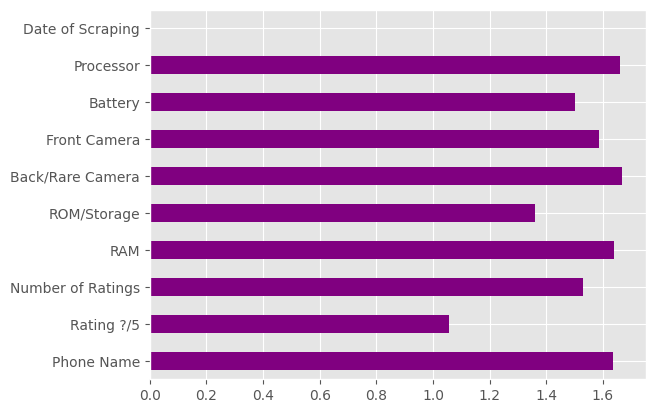

In [16]:
plt.style.use("ggplot")
importance=mutual_info_classif(X,y)
feature_impo=pd.Series(importance,X.columns[0:len(X.columns)])
feature_impo.plot(kind="barh",color="purple")
plt.show()

In [17]:
X=df.drop(["Date of Scraping"],axis=1)

In [18]:
X.head(2)

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR
0,746,4.2,404,16,14,171,26,78,187,407
1,789,4.2,639,25,20,118,32,78,173,45


# Splitting the Dataset into Train and Test set

In [19]:
Xtrain, xtest,ytrain,ytest=train_test_split(X,y,test_size=0.20,random_state=1)

<function matplotlib.pyplot.show(close=None, block=None)>

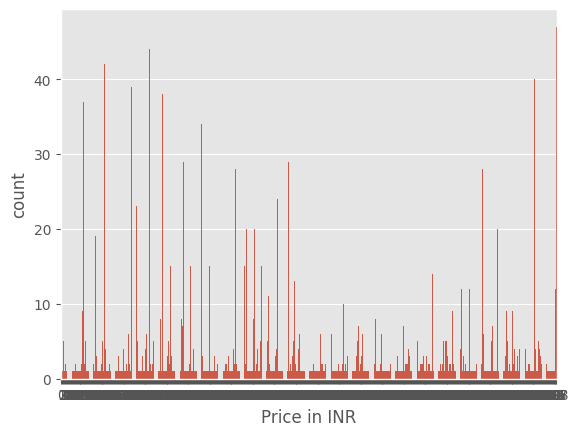

In [20]:
sns.countplot(x="Price in INR",data=df)
plt.show

Putting all the algorithm into a pipeline

In [21]:
from sklearn.pipeline import Pipeline
Pipelines={
      "LinearRegression_Model":Pipeline([("Scaler",StandardScaler()),("Regression",LinearRegression())]),
      "DecisionTreeRegressor_Model":Pipeline([("Scaler",StandardScaler()),("Regression",DecisionTreeRegressor())]),
      "MLPRegressor_Model":Pipeline([('Scaler',StandardScaler()),('Regression',MLPRegressor())]),
      "RandomForestRegressor_Model":Pipeline([('Scaler',StandardScaler()),('Regression',RandomForestRegressor())]),
}

FITTING TRAIN DATASET TO THE DIFFERENT MODELS

In [22]:
for name,pipeline in Pipelines.items():
    accuracy=pipeline.fit(Xtrain,ytrain)
    print(name,"in process.....")
    print("Done fitting Training set to the",name,".\n")

LinearRegression_Model in process.....
Done fitting Training set to the LinearRegression_Model .

DecisionTreeRegressor_Model in process.....
Done fitting Training set to the DecisionTreeRegressor_Model .



c:\Users\hdwipe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor_Model in process.....
Done fitting Training set to the MLPRegressor_Model .

RandomForestRegressor_Model in process.....
Done fitting Training set to the RandomForestRegressor_Model .



# prediction

In [23]:
for name,pipeline in Pipelines.items():
    pred1=pipeline.predict(xtest)
    print(name,"Prediction","\n",pred1,"\n")

LinearRegression_Model Prediction 
 [202.  55. 135. 106. 128. 441. 506. 106. 495. 311. 388. 201. 113. 518.
 235. 147.  79. 323. 244. 301. 335. 461. 442.  92.  95. 485. 472. 311.
 382. 258. 506. 317. 357.   2. 413.  71. 188. 226. 225.  92. 451.  79.
 495.  92.  21. 244.  87. 200. 110. 249.  92. 114. 300. 409.  92. 209.
 160.  79. 469. 238. 380.  36. 226.  23. 433. 255. 441. 518. 258.  45.
 106.  40. 518.  65. 164. 123.  36. 388. 145. 349.  23. 507. 127. 167.
 363. 485. 238. 244. 244. 518.  29.  88.  36. 202.  59. 329. 516. 194.
 495.  92. 465. 258. 203. 173. 315. 128.   2.  92. 182. 182. 518.  18.
 127. 394. 112. 198. 261. 106.  60. 456. 238.  79. 182. 166. 335. 106.
 518. 335. 156. 209. 294. 276.  43. 378. 128. 483. 441. 167. 295. 472.
 352. 226. 248.  73.  61. 473.  96. 462.   6. 202. 243. 224. 147. 255.
  89. 209. 419. 241.  23. 506.  23.  45. 238.   8.  45. 340.  89. 163.
 232. 106. 257. 161. 485. 485.  53. 238.  96. 414. 314.  74. 518. 518.
 417. 173. 147. 518. 295. 474. 504. 287. 

In [24]:
for name,pipeline in Pipelines.items():
    accuracy=pipeline.score(xtest,ytest)
    print(F"accuracy of {name}:","------------------------", accuracy)
    print("Mean Absolute Error for:",name,"------------", mean_absolute_error(ytest,pipeline.predict(xtest)))
    print("Mean Absolute Percentage Error for:",name,"-", mean_absolute_percentage_error(ytest,pipeline.predict(xtest)))
    print("Mean Squared Error for:",name,"-------------", mean_squared_error(ytest,pipeline.predict(xtest)))
    # R-Squared i use only on regression model There fore,
    print(name,"perfamance, R-Squared:","--------------",r2_score(ytest,pipeline.predict(xtest)))
    # will excluded
    print("")

accuracy of LinearRegression_Model: ------------------------ 1.0
Mean Absolute Error for: LinearRegression_Model ------------ 1.1465224904737703e-13
Mean Absolute Percentage Error for: LinearRegression_Model - 2.011170220833214e-15
Mean Squared Error for: LinearRegression_Model ------------- 2.367790015831026e-26
LinearRegression_Model perfamance, R-Squared: -------------- 1.0

accuracy of DecisionTreeRegressor_Model: ------------------------ 0.9999767827937657
Mean Absolute Error for: DecisionTreeRegressor_Model ------------ 0.32608695652173914
Mean Absolute Percentage Error for: DecisionTreeRegressor_Model - 0.0036068958360955324
Mean Squared Error for: DecisionTreeRegressor_Model ------------- 0.5597826086956522
DecisionTreeRegressor_Model perfamance, R-Squared: -------------- 0.9999767827937657

accuracy of MLPRegressor_Model: ------------------------ 0.938579185551352
Mean Absolute Error for: MLPRegressor_Model ------------ 29.448832304507572
Mean Absolute Percentage Error for: ML

Actual price versus predicted price

In [25]:
for name,pipeline in Pipelines.items():
    accuracy=pipeline.score(xtest,ytest)
    Precision=r2_score(ytest,pipeline.predict(xtest))
    print(F"{name} accuracy:",accuracy)
    print(F"{name} accuracy:",Precision)
    outcome={
        "Actual Price":ytest,
        "predicted Price":pipeline.predict(xtest)
        }
    df3=pd.DataFrame(outcome)
    print(name,"\n",df3.head(),"\n")

LinearRegression_Model accuracy: 1.0
LinearRegression_Model accuracy: 1.0
LinearRegression_Model 
       Actual Price  predicted Price
556            202            202.0
1386            55             55.0
1450           135            135.0
111            106            106.0
1787           128            128.0 

DecisionTreeRegressor_Model accuracy: 0.9999767827937657
DecisionTreeRegressor_Model accuracy: 0.9999767827937657
DecisionTreeRegressor_Model 
       Actual Price  predicted Price
556            202            202.0
1386            55             53.0
1450           135            135.0
111            106            106.0
1787           128            128.0 

MLPRegressor_Model accuracy: 0.938579185551352
MLPRegressor_Model accuracy: 0.938579185551352
MLPRegressor_Model 
       Actual Price  predicted Price
556            202       199.732856
1386            55        55.948651
1450           135       126.347443
111            106        66.758161
1787           128       1

# REGRESSION MATRIX

LinearRegression_Model accuracy: 1.0
Evaluating LinearRegression_Model on the testing data
LinearRegression_Model perfamance, R-Squared: 1.0


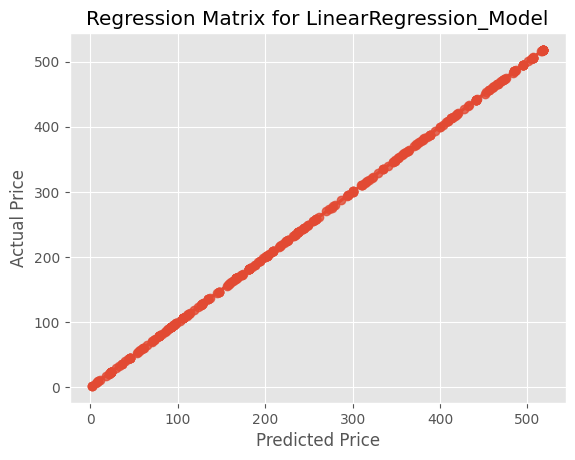

DecisionTreeRegressor_Model accuracy: 0.9999767827937657
Evaluating DecisionTreeRegressor_Model on the testing data
DecisionTreeRegressor_Model perfamance, R-Squared: 0.9999767827937657


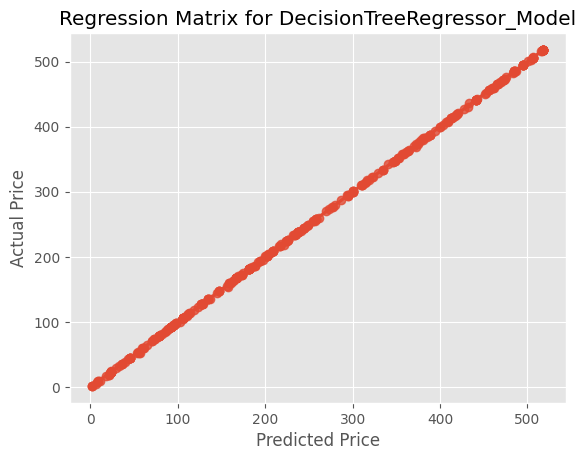

MLPRegressor_Model accuracy: 0.938579185551352
Evaluating MLPRegressor_Model on the testing data
MLPRegressor_Model perfamance, R-Squared: 0.938579185551352


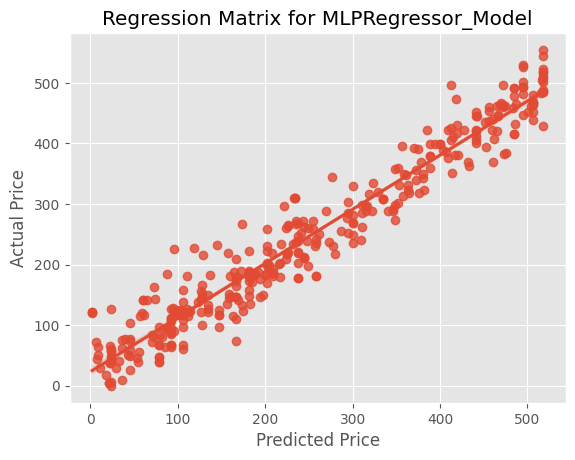

RandomForestRegressor_Model accuracy: 0.9999920116919165
Evaluating RandomForestRegressor_Model on the testing data
RandomForestRegressor_Model perfamance, R-Squared: 0.9999920116919165


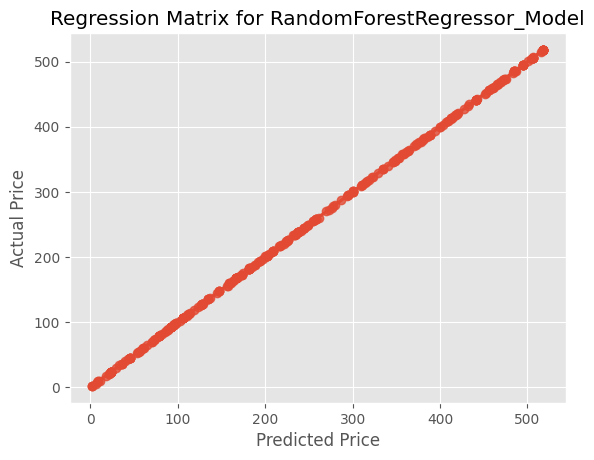

In [26]:
for name,pipeline in Pipelines.items():
    accuracy=pipeline.score(xtest,ytest)
    print(F"{name} accuracy:",accuracy)
    print(f"Evaluating {name} on the testing data")
    print(name,"perfamance, R-Squared:",r2_score(ytest,pipeline.predict(xtest)))
    plt.figure()
    sns.regplot(x=ytest,y=pipeline.predict(xtest))
    plt.title(f"Regression Matrix for {name}")
    plt.xlabel("Predicted Price")
    plt.ylabel("Actual Price")
    plt.show()

In [27]:
import joblib

In [28]:
for name,pipeline in Pipelines.items():
    joblib.dump(pipeline,f"{name}.joblib")
    print(f"{name} saved successfully")

LinearRegression_Model saved successfully
DecisionTreeRegressor_Model saved successfully
MLPRegressor_Model saved successfully
RandomForestRegressor_Model saved successfully
